In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [5]:
#Load raw dataset (training)
with open("dataset_training_raw.json", "r") as f:
    all_data = json.load(f)
del f

Note: The keys are "0.3 weighted", "0.7 weighted", "0.3 nonweighted", "0.7 nonweighted".  
This corresponds to probability of an edge in QAOA Hamiltonian using Erdos-Renyi graphs and whether the edge is weighted or not.  
The weights are drawn from a normal distribution of mean=0, stdev=1.

In [ ]:

for dataset in all_data.values():
    no_samples = len(dataset)
    break

angles_30weighted = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_30weighted[s,:] = all_data["0.3 weighted"][str(s)][1]
    angles_30weighted[s,:3] = np.mod( angles_30weighted[s, :3], np.pi/2 )
    angles_30weighted[s,3:] *= -1

angles_30nonweight = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_30nonweight[s,:] = all_data["0.3 nonweighted"][str(s)][1]
    angles_30nonweight[s,:3] = np.mod( angles_30nonweight[s, :3], np.pi/2 )
    angles_30nonweight[s,3:] *= -1

angles_70weighted = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_70weighted[s,:] = all_data["0.7 weighted"][str(s)][1]
    angles_70weighted[s,:3] = np.mod( angles_70weighted[s, :3], np.pi/2 )
    angles_70weighted[s,3:] *= -1

angles_70nonweight = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_70nonweight[s,:] = all_data["0.7 nonweighted"][str(s)][1]
    angles_70nonweight[s,:3] = np.mod( angles_70nonweight[s, :3], np.pi/2 )
    angles_70nonweight[s,3:] *= -1

## Plot the distribution of optimised (six) QAOA parameters along x-axis

These are the desired output values of the neural network.

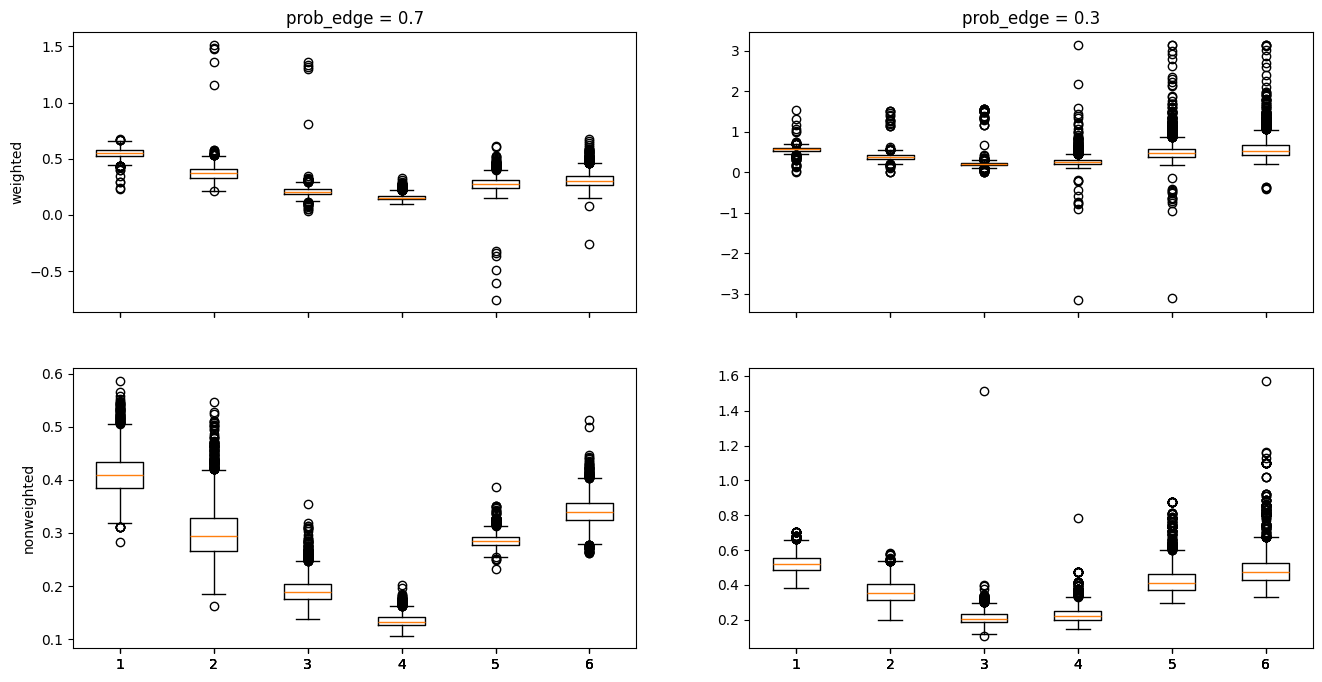

In [32]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=False,figsize=(16,8))


axs[0,0].boxplot(angles_70weighted)
axs[0,0].set_title("prob_edge = 0.7")
axs[0,0].set_ylabel("weighted")

axs[0,1].boxplot(angles_30weighted)
axs[0,1].set_title("prob_edge = 0.3")
axs[1,0].boxplot(angles_70nonweight)
axs[1,0].set_ylabel("nonweighted")
axs[1,1].boxplot(angles_30nonweight)
plt.show()

# Sorting  through dataset to remove outliers.
This is because far outliers could hurt performance of neural network training.
And outliers are common given the unpredictable nature of the QAOA optimisation.  
Choosing only samples which have ALL features that fall within the chosen range of [5,95] percentile of output values.  
Then normalise by minimum and maximum by feature so that all sample values fall in the range [0,1].  

In [30]:
from sort_data import sort_dataset
x_inputs, y_outputs, xmins, xminmaxrange, ymins, yminmaxrange = sort_dataset(all_data, no_features=36, no_outputs=6, normed=True)



There are 16000 data in this raw dataset
There are 11225 samples when choosing within the [5,95] percentile of each output feature


## Visualise sample dataset, and the chosen range of output values. 
Every sample that has a datapoint falling outside this range is ignored from training data.  
Additionally, neural network output will always fall in this range by design since I used sigmoid function which has bounded output values.


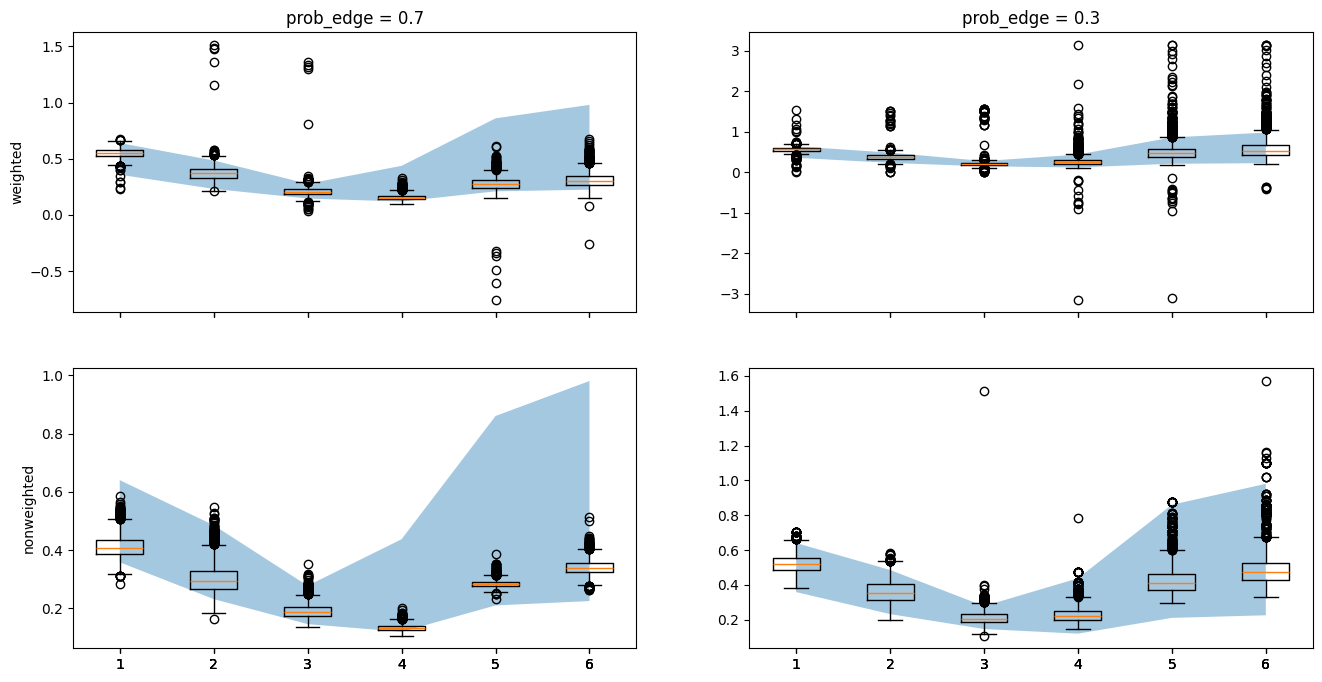

In [34]:
ymaxs = yminmaxrange + ymins

fig, axs = plt.subplots(2,2,sharex=True,sharey=False,figsize=(16,8))
axs[0,0].boxplot(angles_70weighted)
axs[0,0].set_title("prob_edge = 0.7")
axs[0,0].set_ylabel("weighted")

axs[0,1].boxplot(angles_30weighted)
axs[0,1].set_title("prob_edge = 0.3")
axs[1,0].boxplot(angles_70nonweight)
axs[1,0].set_ylabel("nonweighted")
axs[1,1].boxplot(angles_30nonweight)

for ax in axs.flatten():
    ax.fill_between( range(1,7), ymins, ymaxs, alpha=0.4 )
plt.show()
